In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ds_salaries.csv')

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
X = df[['experience_level','employment_type','job_title','remote_ratio','company_size']]

In [6]:
y = df['salary_in_usd']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder = LabelEncoder()

In [11]:
X_train['experience_level'] = encoder.fit_transform(X_train['experience_level'])
X_test['experience_level'] = encoder.transform(X_test['experience_level'])

In [12]:
X_train['employment_type'] = encoder.fit_transform(X_train['employment_type'])
X_test['employment_type'] = encoder.transform(X_test['employment_type']) 

In [13]:
X_train = pd.get_dummies(X_train, columns=['job_title', 'company_size'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['job_title', 'company_size'], drop_first=True)

In [14]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()

In [40]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test_scaled)

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [46]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 47357.04559923282
MSE: 4567539236.346067
R² Score: 0.00624856180277733


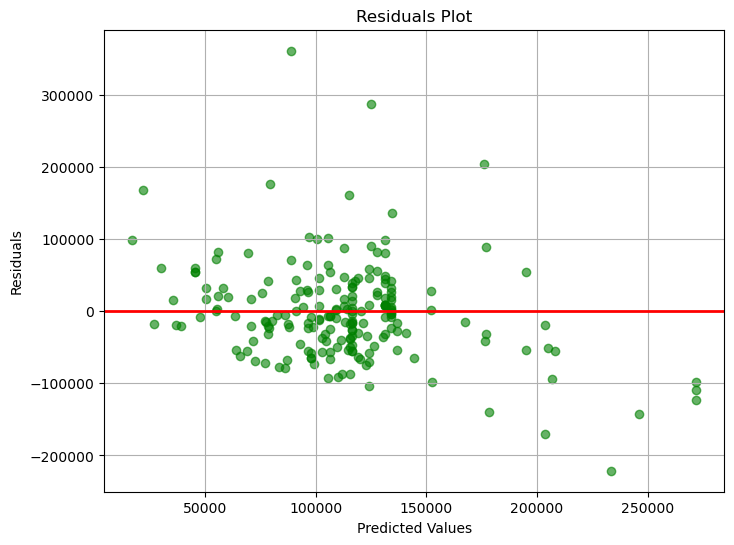

In [52]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred,residuals,color='green',alpha=0.6)
plt.axhline(y=0, color='red', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

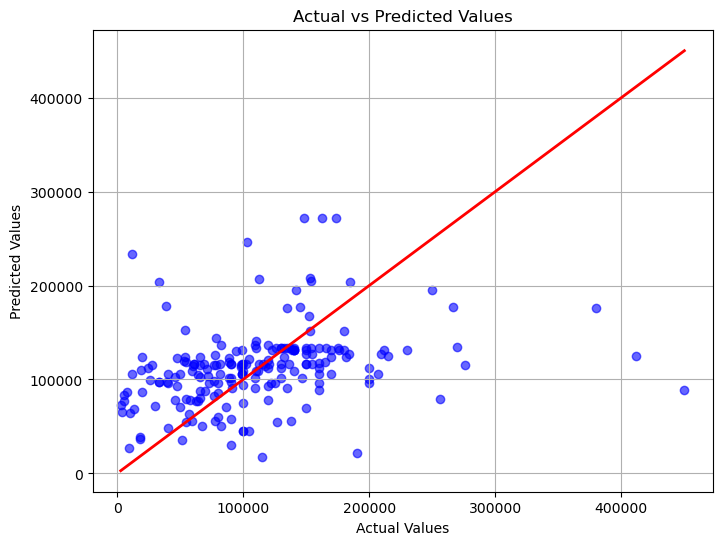

In [54]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='blue',alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()